# MNIST DATASET classification using Random Forest Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
train_file = pd.read_csv('Downloads/train.csv')
test_file = pd.read_csv('Downloads/test.csv')

In [4]:
train_file.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_file.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
np.sort(train_file.label.unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [7]:
num_train,num_validation = int(len(train_file)*0.8),int(len(train_file)*0.2)

In [8]:
num_train,num_validation

(33600, 8400)

In [9]:
x_train,y_train=train_file.iloc[:num_train,1:].values,train_file.iloc[:num_train,0].values

In [10]:
x_validation,y_validation=train_file.iloc[num_train:,1:].values,train_file.iloc[num_train:,0].values

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


#### Visualize Training Data

Label: 7


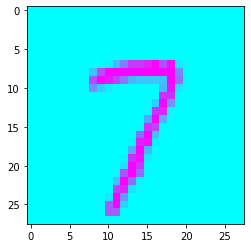

In [50]:
index=18
print("Label: " + str(y_train[index]))
plt.imshow(x_train[index].reshape((28,28)),cmap='cool')
plt.show()

In [29]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
prediction_validation = clf.predict(x_validation)

In [31]:
print("Validation Accuracy: " + str(accuracy_score(y_validation,prediction_validation)))

Validation Accuracy: 0.9642857142857143


In [32]:
print("Validation Confusion Matrix: \n" + str(confusion_matrix(y_validation,prediction_validation)))

Validation Confusion Matrix: 
[[836   0   0   0   0   1   9   0   6   0]
 [  0 939   3   2   2   1   1   1   1   0]
 [  7   0 772   4   1   2   2   4   8   1]
 [  1   1  16 834   0  12   1   3  10   4]
 [  1   2   1   0 777   0   8   0   4  18]
 [  1   0   1  16   1 712   4   0   6   6]
 [  4   2   1   0   3   4 816   0   1   0]
 [  0   2   6   1   1   0   0 860   3  11]
 [  2  10   2   3   2   5   3   1 769   5]
 [  5   4   4  11  11   3   0   9   8 785]]


#### Wrong Predictions

Predicted 3 as 5


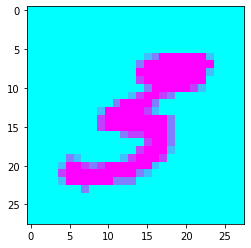

In [39]:
index=9
print("Predicted " + str(y_validation[y_validation!=prediction_validation][index]) + " as " + 
     str(prediction_validation[y_validation!=prediction_validation][index]))
plt.imshow(x_validation[y_validation!=prediction_validation][index].reshape((28,28)),cmap='cool')

In [40]:
x_test=test_file

In [41]:
prediction_test = clf.predict(x_test)

C:\Users\abhij\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


#### Predictions for Test data

Predicted 0


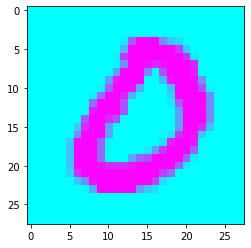

In [45]:
index=6
print("Predicted " + str(prediction_test[index]))
plt.imshow(x_test.iloc[index].values.reshape((28,28)),cmap='cool')